In [24]:
import numpy as np
import seaborn as sn
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [25]:
#get MNIST Dataset
(train_dataset, train_labels), (test_dataset, test_labels) = tf.keras.datasets.mnist.load_data()

train_dataset, test_data = np.array(train_dataset, np.float32), np.array(test_dataset, np.float32)

#Formatting and normalization
train_dataset = (train_dataset.reshape([-1, 784]))/255.0
test_dataset = (test_dataset.reshape([-1, 784]))/255.0

In [26]:
#SVM 
#without Regularization
svm = LinearSVC(dual=False,random_state=0, C=1E10)
svm.fit(train_dataset,train_labels)

LinearSVC(C=10000000000.0, dual=False, random_state=0)

In [27]:
#Accuracy
prediction = svm.predict(test_dataset)
print("accuracy : ", accuracy_score(test_labels,prediction))

accuracy :  0.9168


<AxesSubplot:>

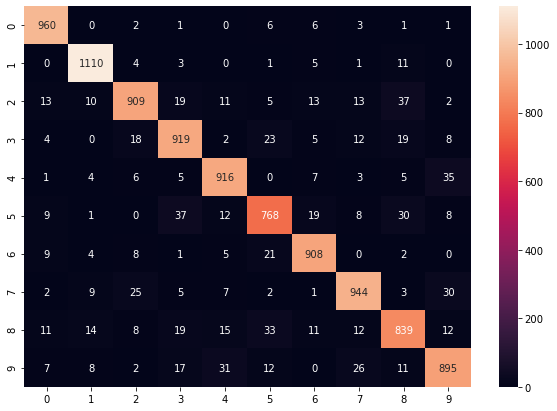

In [28]:
#Create a Confusion Matrix
array = confusion_matrix(test_labels,prediction)
df_cm = pd.DataFrame(array, index = [i
      for i in "0123456789"
   ],
   columns = [i
      for i in "0123456789"
   ])
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot = True,fmt='g')